# Walmart Sales Forecast

The dataset has weekly sales of 45 stores of USA

In [49]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

In [50]:
import matplotlib
matplotlib.rc('xtick', labelsize=40) 
matplotlib.rc('ytick', labelsize=40) 

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

import statsmodels.api as sm

###importing dataset of walmart

In [51]:
train=pd.read_csv(r"C:\Users\ajay\Downloads\Walmart-Sales-Forecast-master\Walmart-Sales-Forecast-master\train.csv")

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [53]:
train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [54]:
# missing_data = pd.DataFrame((train.isnull().sum(axis=0)*100)/len(train))
# # # count the number of null values in the column and their perecentage of the total data
# # missing_data = missing_data.rename(columns = {'index':'Column', 0:'Missing Percentage'})
# # #missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [55]:
train.Date.dtypes

dtype('O')

In [56]:
#Since datatypes of date is object we will convert it into datetime format for further process

train['Date'] = pd.to_datetime(train['Date'])

In [57]:
train['Date'].dtype  #changed datatype of date column

dtype('<M8[ns]')

#### Summing all the cumulative sales of different stores on the same dates together

In [58]:
#storing sales of same dates

ts = train.groupby('Date')['Weekly_Sales'].sum().reset_index() 

In [59]:
ts = ts.set_index('Date')  #setting date as index of this Dataframe
ts.index

DatetimeIndex(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26',
               '2010-03-05', '2010-03-12', '2010-03-19', '2010-03-26',
               '2010-04-02', '2010-04-09',
               ...
               '2012-08-24', '2012-08-31', '2012-09-07', '2012-09-14',
               '2012-09-21', '2012-09-28', '2012-10-05', '2012-10-12',
               '2012-10-19', '2012-10-26'],
              dtype='datetime64[ns]', name='Date', length=143, freq=None)

In [60]:
# diff = pd.DataFrame(np.concatenate([ts[0:5], ts[0:5].diff()]),)
# print(diff)
# # 

dff = ts[0:5]
dff_dfii = ts[0:5].diff()
#dfx = pd.DataFrame(dff, dff_dfii)

print(dff, dff_dfii)

            Weekly_Sales
Date                    
2010-02-05   49750740.50
2010-02-12   48336677.63
2010-02-19   48276993.78
2010-02-26   43968571.13
2010-03-05   46871470.30             Weekly_Sales
Date                    
2010-02-05           NaN
2010-02-12   -1414062.87
2010-02-19     -59683.85
2010-02-26   -4308422.65
2010-03-05    2902899.17


###### Cumulative Sales Plot
The graph shows sales from 45 stores in US. We can notice that sales increases every year just before new year.

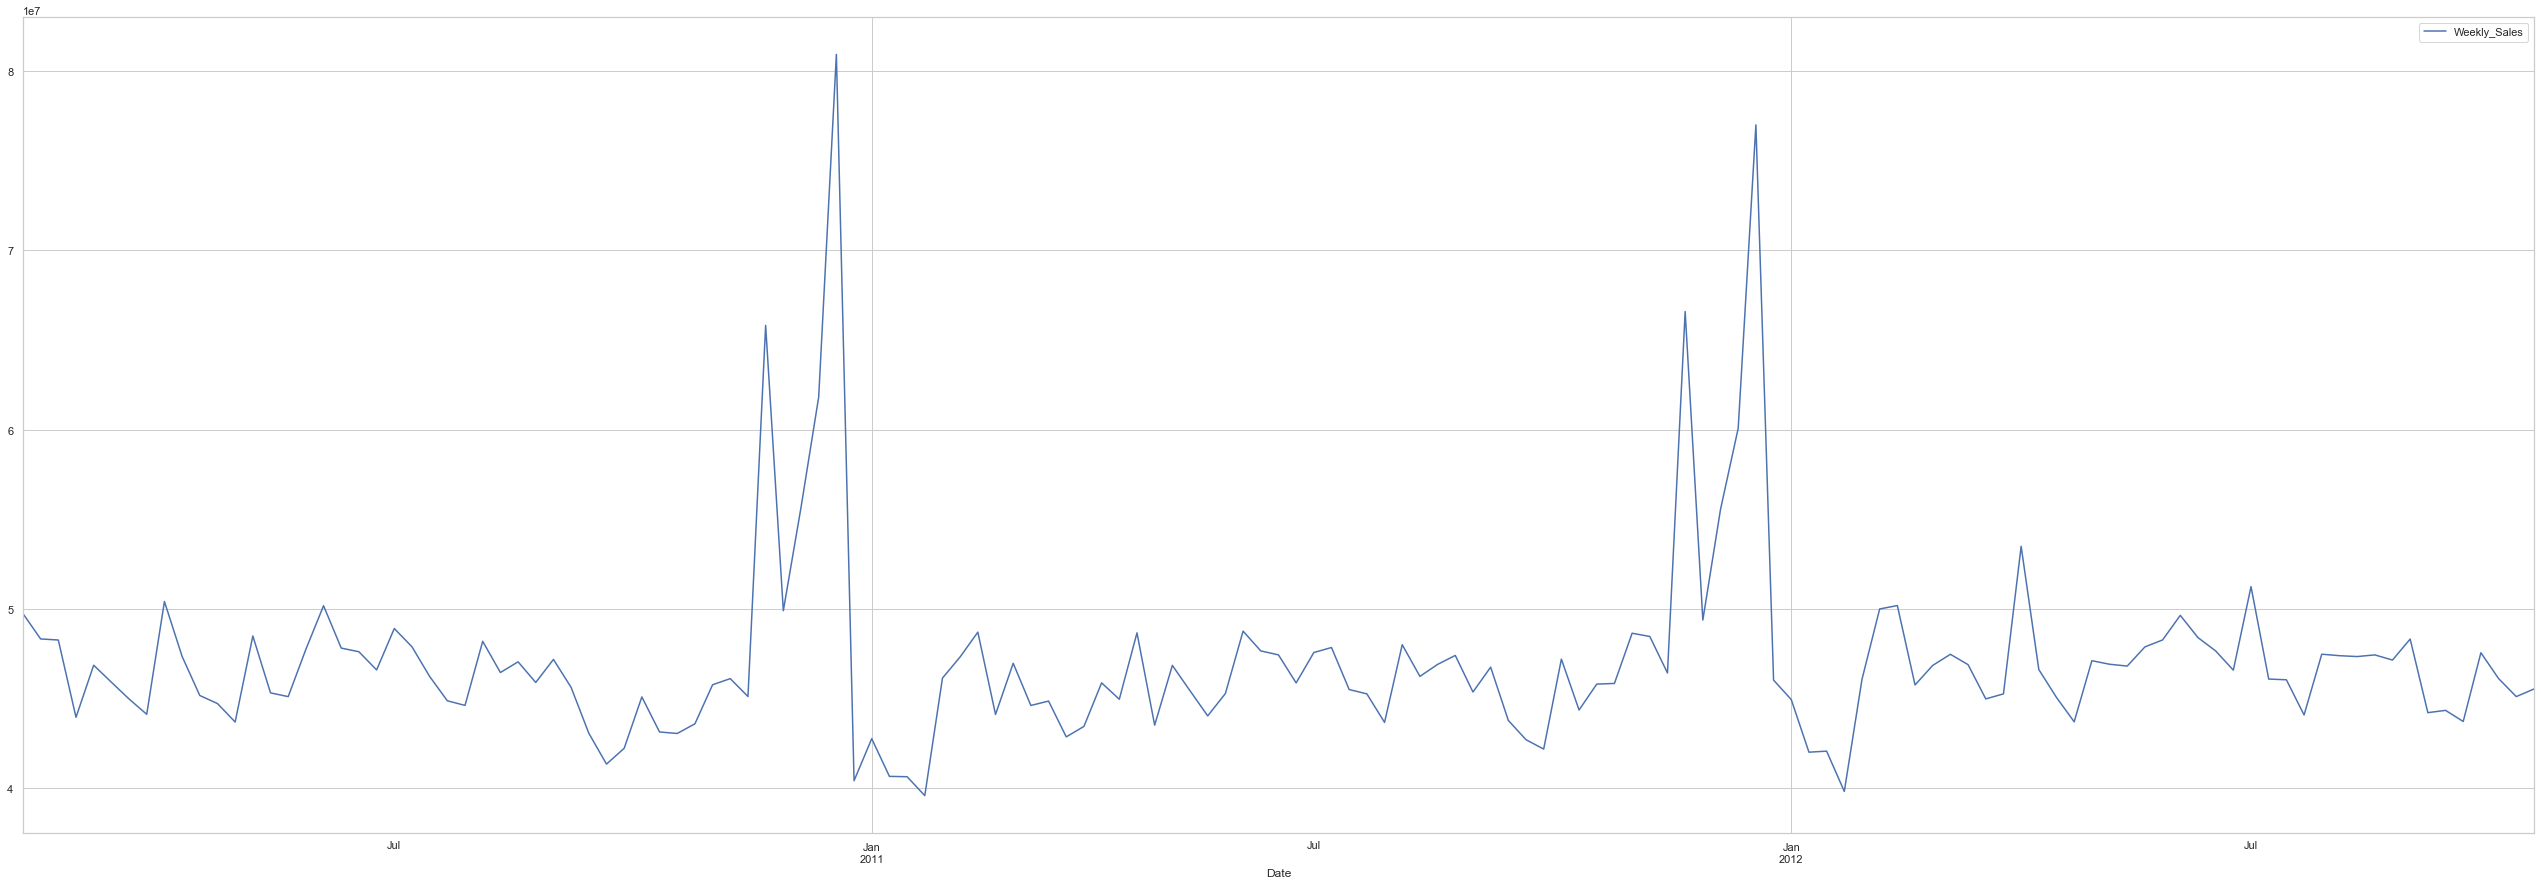

In [61]:
ts.plot(figsize=(45,15)) 

###### Stationarity  : Adfuller Test
 To determine the forecast a time series, it needs to be stationary. Adfuller test helps us in determining the stationarity of time series

##Augmented Dickey-Fuller uses an autoregressive model and optimizes an information criterion across multiple different lag values.

Dickey fuller test is also called unit root

The null hypothesis of the test is that the time series can be represented by a dickey fullertest, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.

p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [62]:
#adfuller test will be used to determine stationarity

from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics      # 3 months of rolling mean we are considering using 12 weeks
    rolmean = timeseries.rolling(12).mean() 
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC') #we use AIC to determine the optimal laglength function
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput,dftest)

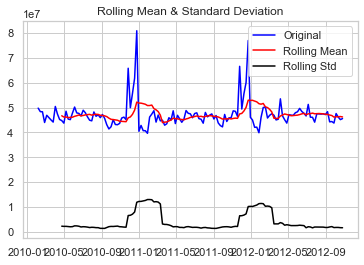

Results of Dickey-Fuller Test:
Test Statistic                -5.908298e+00
p-value                        2.675979e-07
#Lags Used                     4.000000e+00
Number of Observations Used    1.380000e+02
Critical Value (1%)           -3.478648e+00
Critical Value (5%)           -2.882722e+00
Critical Value (10%)          -2.578065e+00
dtype: float64 (-5.908297957186321, 2.67597915898623e-07, 4, 138, {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}, 4314.46014989216)


In [63]:
test_stationarity(ts['Weekly_Sales'])

#### Running the example prints the test statistic value of -5. The more negative this statistic, the more likely we are to reject the null hypothesis (we have a stationary dataset).

As part of the output, we get a look-up table to help determine the ADF statistic. We can see that our statistic value of -5.9 is less than the value of -3.47 at 1%.

This suggests that we can reject the null hypothesis with a significance level of less than 1% (i.e. a low probability that the result is a statistical fluke).

Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.

## Taking log of the time series to further achieve a level of stationarity

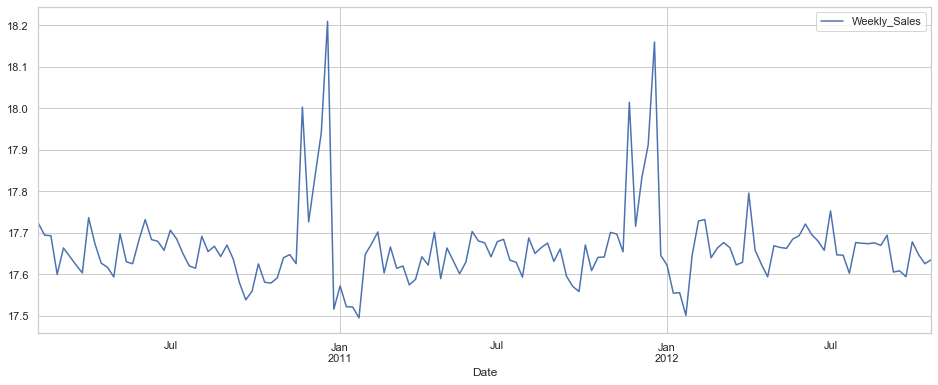

In [64]:
ts_log = np.log(ts)
ts_log.plot(figsize = (16,6))

###### Gaps in TIme Series
Since we have weekly gaps in the time series, we need to set the frequency

The value we give here will influence the results we get later when running analysis operations. E.g.if we wanted to get all your results in the unit of hours instead of in days, you would pass 24 instead of 1 as frequency, because your data samples were taken in a frequency of 24 hours.

In [65]:
ts.index = pd.DatetimeIndex(ts.index.values,
                               freq=ts.index.inferred_freq)
ts_log.index = pd.DatetimeIndex(ts_log.index.values,
                               freq=ts_log.index.inferred_freq)

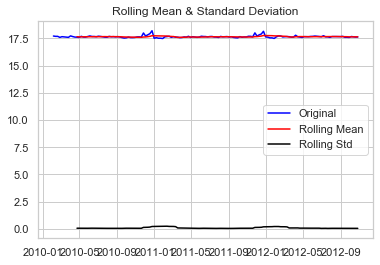

Results of Dickey-Fuller Test:
Test Statistic                -6.332826e+00
p-value                        2.878283e-08
#Lags Used                     4.000000e+00
Number of Observations Used    1.380000e+02
Critical Value (1%)           -3.478648e+00
Critical Value (5%)           -2.882722e+00
Critical Value (10%)          -2.578065e+00
dtype: float64 (-6.3328258455600706, 2.878282547251407e-08, 4, 138, {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}, -255.7008831678603)


In [66]:
test_stationarity(ts_log['Weekly_Sales'])

In [67]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2010-02-05 to 2012-10-26
Freq: W-FRI
Data columns (total 1 columns):
Weekly_Sales    143 non-null float64
dtypes: float64(1)
memory usage: 2.2 KB


#### Eliminating Seasonality & Trends
1. Differencing : THis is specifically to remove the trend in the time series by differencing from the shifted version of same time series
2. Decomposing : It decomposes the time series into 3 parts such as TrenDs,Seasonality and Residual. We perform adfuller test on residual and if it's stationary we add trends and seasonality to the time series later after arima prediction, 

In [68]:
ts_log.shift()

,Weekly_Sales
2010-02-05,NaN
2010-02-12,17.722536
2010-02-19,17.693701
2010-02-26,17.692466
2010-03-05,17.598986
...,...
2012-09-28,17.607726
2012-10-05,17.593657
2012-10-12,17.677642
2012-10-19,17.646942


##### Differencing Method

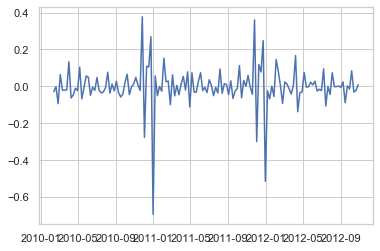

In [69]:
ts_log_diff = ts_log - ts_log.shift() # we are differencing to find a more stable stationary value.
plt.plot(ts_log_diff)

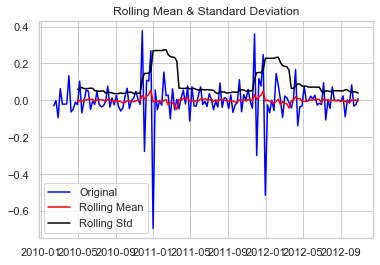

Results of Dickey-Fuller Test:
Test Statistic                -6.747059e+00
p-value                        3.016343e-09
#Lags Used                     7.000000e+00
Number of Observations Used    1.340000e+02
Critical Value (1%)           -3.480119e+00
Critical Value (5%)           -2.883362e+00
Critical Value (10%)          -2.578407e+00
dtype: float64 (-6.747058932963329, 3.0163427929850427e-09, 7, 134, {'1%': -3.480118600110386, '5%': -2.8833618426136196, '10%': -2.578407034974382}, -235.32665327833104)


,Weekly_Sales
2010-02-12,-0.028835
2010-02-19,-0.001236
2010-02-26,-0.093480
2010-03-05,0.063934
2010-03-12,-0.020391
...,...
2012-09-28,-0.014069
2012-10-05,0.083985
2012-10-12,-0.030700
2012-10-19,-0.022052


In [70]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff['Weekly_Sales'])
ts_log_diff

Setting the frequency of ts_log_diff for further analysis

In [71]:
ts_log_diff.index = pd.DatetimeIndex(ts_log_diff.index.values,
                               freq=ts_log_diff.index.inferred_freq)

##### Decomposing Method


Plotting time series data is an important first step in analyzing their various components. Beyond that, however, we need a more formal means for identifying and removing characteristics such as a trend or seasonal variation.The decomposition model reduces a time series into 3 components: trend, seasonal effects, and random errors. 

components timeseries model is made up of are defined as follows:

Level: The average value in the series.
Trend: The increasing or decreasing value in the series.
Seasonality: The repeating short-term cycle in the series.
Noise: The random variation in the series.


We are using additive model in decomposition - 
The additive model is useful when the seasonal variation is relatively constant over time. The multiplicative model is useful when the seasonal variation increases over time.

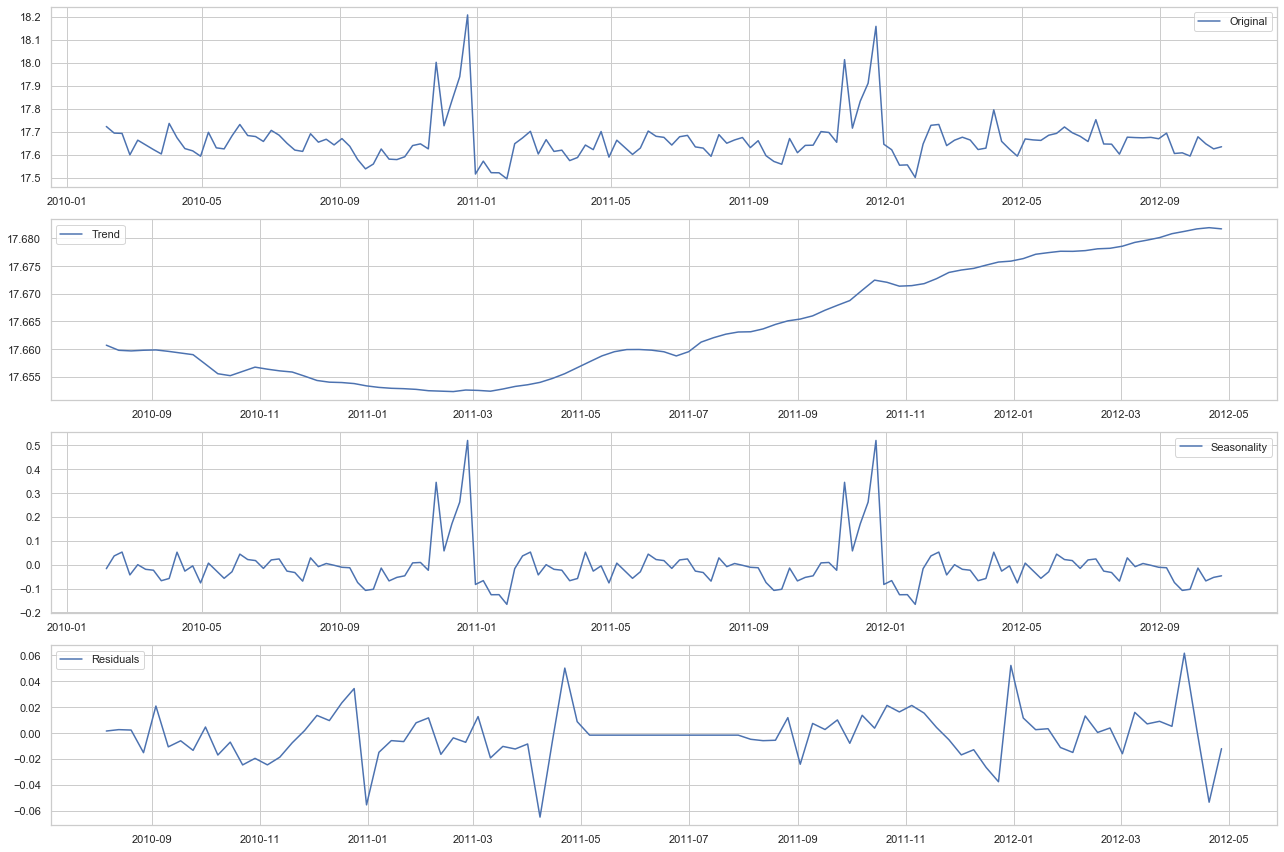

In [72]:
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
#rcParams change the bydefault size of figure
rcParams['figure.figsize'] = 18, 12

decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [73]:
#Null values are present in residual section.

residual.isnull().sum()



Weekly_Sales    52
dtype: int64

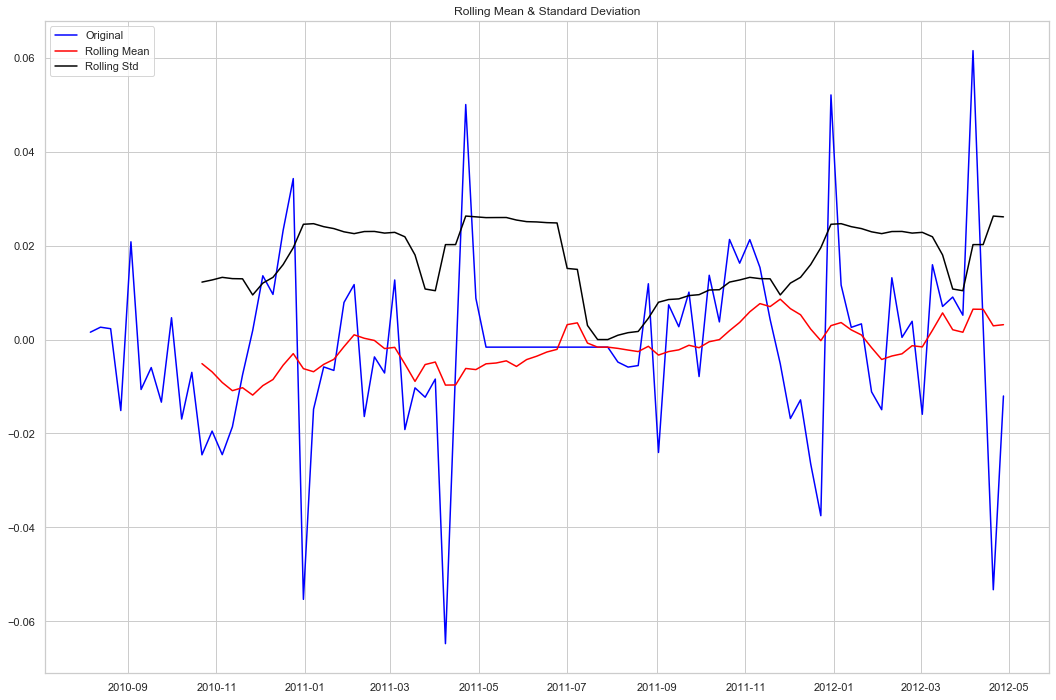

Results of Dickey-Fuller Test:
Test Statistic                -6.824472e+00
p-value                        1.963835e-09
#Lags Used                     1.000000e+00
Number of Observations Used    8.900000e+01
Critical Value (1%)           -3.506057e+00
Critical Value (5%)           -2.894607e+00
Critical Value (10%)          -2.584410e+00
dtype: float64 (-6.824472145939111, 1.9638352001837137e-09, 1, 89, {'1%': -3.506057133647011, '5%': -2.8946066061911946, '10%': -2.5844100201994697}, -387.9881648008946)


In [74]:
# Checking stationarity of a residual column.

ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose['Weekly_Sales']) 

In [75]:
len(ts_log_decompose)

91

Seasonal decompose reduces the  time series into diffirent time series who either product(multiplicative model) or sum(additive model) makes the original time series. 

### Forecasting the Time Series

Plotting the ACF and PACF graph to determin p,q,d values

In [76]:
from statsmodels.tsa.stattools import acf, pacf

In [77]:
lag_acf = acf(ts_log_diff, nlags = 24)

lag_pacf = pacf(ts_log_diff, nlags = 24)
print(lag_pacf, lag_acf)

# plt.figure(figsize= (16,7))
# plt.plot(lag_acf, marker='o')

C:\Users\ajay\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


[ 1.         -0.40125326 -0.14295537 -0.28025492  0.23928078 -0.2348319
 -0.30445446 -0.03734203 -0.19099831  0.03718624 -0.08593253 -0.13179022
 -0.06405237 -0.15271405 -0.17244498 -0.08662817 -0.07804893  0.01410591
 -0.08599807 -0.13973577 -0.05850108 -0.1508507  -0.14287071 -0.19692765
 -0.24007895] [ 1.         -0.39842753  0.04048684 -0.18774719  0.36750569 -0.38001666
 -0.00941484  0.0509206   0.05462347 -0.05151634 -0.02769163  0.08611025
 -0.05083731 -0.00701861 -0.07294868  0.09426309 -0.01269779  0.04794341
 -0.06265297  0.04498831 -0.00204038 -0.03633093 -0.04346425  0.00498118
  0.03540151]


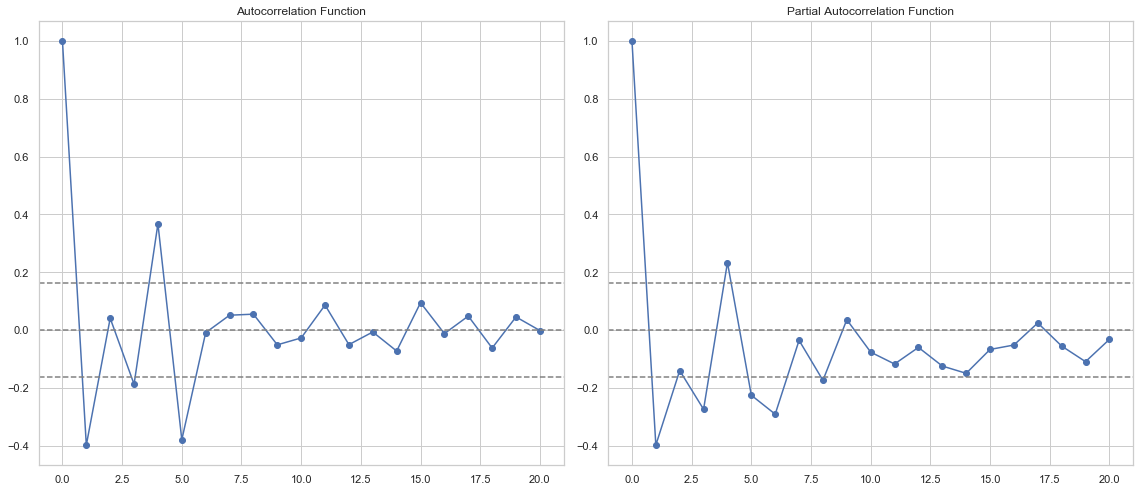

In [32]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

plt.figure(figsize=(16, 7))
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log)),linestyle='--',color='gray') # Confidence interval of
plt.axhline(y=1.96/np.sqrt(len(ts_log)),linestyle='--',color='gray')  #positive and negative side
plt.title('Autocorrelation Function')


#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values.

We notice that in ACF grah p = 1 (it is where it crosses the positive lag) and q = 1 (it is where pacf crosses the positive lag of) 

##### Auto Regression Model ()

In [33]:
from statsmodels.tsa.arima_model import ARIMA

##### Arima Model

Pure AR Models - Depends on the lagged values of the data you are modeling to make forecasts

Pure MA Models - Depends on the errors(residuals) of the previous forecasts you made to make current forecasts

Mixed Models ARMA - Takes into account both of the above factors when making predictions

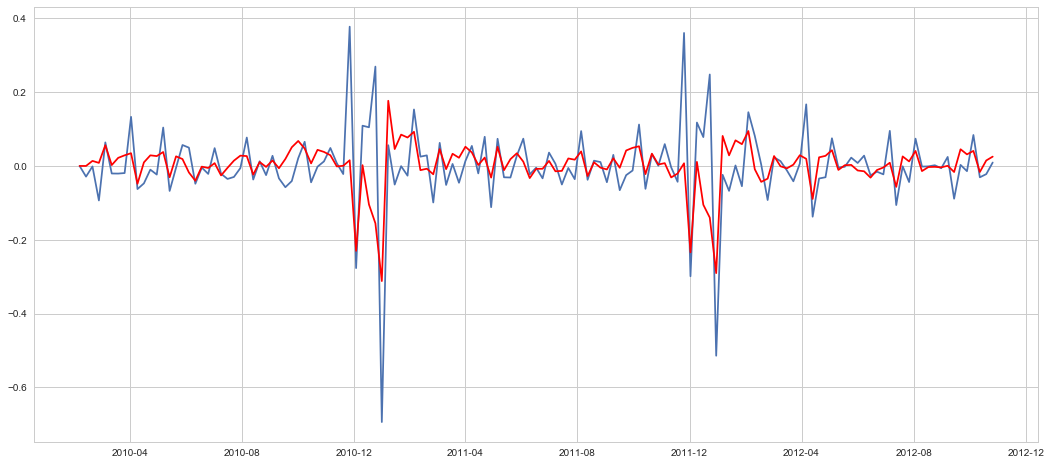

In [104]:

#Arima Model
model = ARIMA(ts_log_diff, order=(2, 0, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

In [105]:
#Finding sum of Residual Sum of Squares(RSS) for evaluation of ARIMA model
RSS = (results_ARIMA.fittedvalues-ts_log_diff['Weekly_Sales'])**2
RSS.fillna(0,inplace=True)
sum(RSS)

1.2014818989005103

RSS = 2.8652824766431704 for order=(3,1,0)
RSS = 2.8944551365379665 for order=(3,1,1)
###### RSS = 1.2014818989005103 for order=(2,0,1)
RSS = 1.4329622165497684 for order=(2,0,0)

In [130]:
results_ARIMA.fittedvalues

2010-02-05    0.000047
2010-02-12    0.000066
2010-02-19    0.013732
2010-02-26    0.008393
2010-03-05    0.056276
2010-03-12    0.002489
2010-03-19    0.021984
2010-03-26    0.028853
2010-04-02    0.034642
2010-04-09   -0.048277
2010-04-16    0.009731
2010-04-23    0.028851
2010-04-30    0.026767
2010-05-07    0.037857
2010-05-14   -0.030502
2010-05-21    0.026105
2010-05-28    0.018724
2010-06-04   -0.017703
2010-06-11   -0.040011
2010-06-18   -0.001818
2010-06-25   -0.005389
2010-07-02    0.007686
2010-07-09   -0.025604
2010-07-16   -0.005087
2010-07-23    0.014428
2010-07-30    0.028015
2010-08-06    0.026811
2010-08-13   -0.023424
2010-08-20    0.010720
2010-08-27   -0.002495
                ...   
2012-04-06    0.019386
2012-04-13   -0.089422
2012-04-20    0.023449
2012-04-27    0.027470
2012-05-04    0.042830
2012-05-11   -0.010731
2012-05-18    0.002012
2012-05-25    0.002893
2012-06-01   -0.012192
2012-06-08   -0.014414
2012-06-15   -0.031562
2012-06-22   -0.011030
2012-06-29 

##### Predicting future values
Predicted the forecast of log of original function

In [140]:
forecast = results_ARIMA.predict(start=143,end=159)

#### Getting Back the Original Function
Adding and Raising to exponent

In [141]:
forecast_cumsum = forecast.cumsum()

In [142]:
rng = pd.date_range('2012-11-02', periods=17, freq='W-FRI')
forecast_log = pd.Series(17.62, index=rng)
forecast_log = forecast_log.add(forecast_cumsum,fill_value=0)

In [143]:
forecast_ARIMA = np.exp(forecast_log)

In [147]:
forecast_ARIMA

2012-11-02    4.563878e+07
2012-11-09    4.594621e+07
2012-11-16    4.614969e+07
2012-11-23    4.626023e+07
2012-11-30    4.632549e+07
2012-12-07    4.636318e+07
2012-12-14    4.638562e+07
2012-12-21    4.639929e+07
2012-12-28    4.640801e+07
2013-01-04    4.641391e+07
2013-01-11    4.641821e+07
2013-01-18    4.642161e+07
2013-01-25    4.642449e+07
2013-02-01    4.642708e+07
2013-02-08    4.642950e+07
2013-02-15    4.643183e+07
2013-02-22    4.643410e+07
Freq: W-FRI, dtype: float64

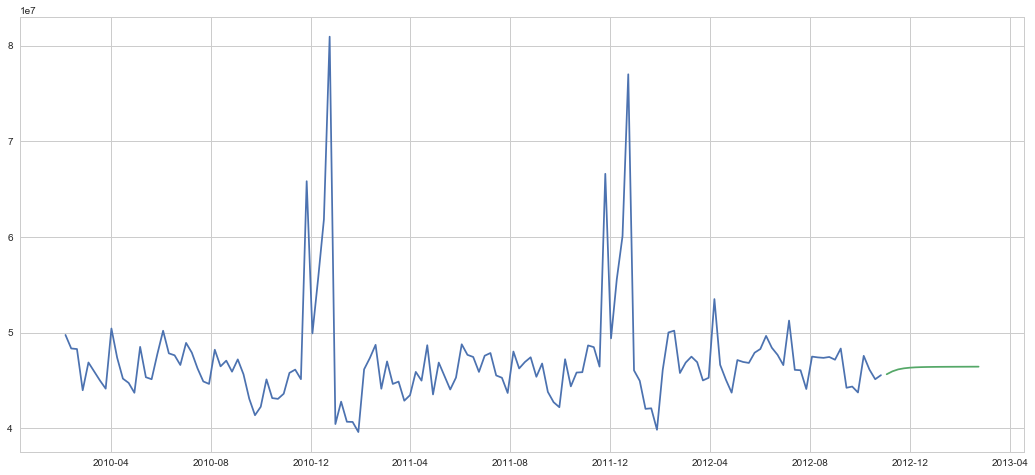

In [145]:
plt.plot(ts)
plt.plot(forecast_ARIMA)

# start my own experiment from here

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


<Figure size 576x432 with 0 Axes>

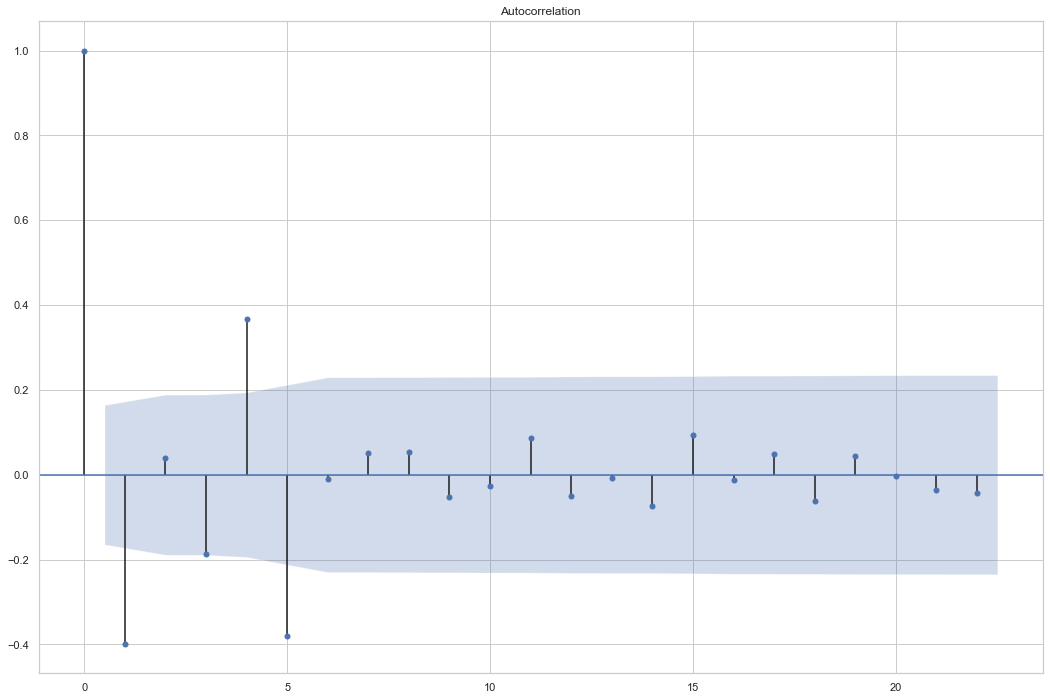

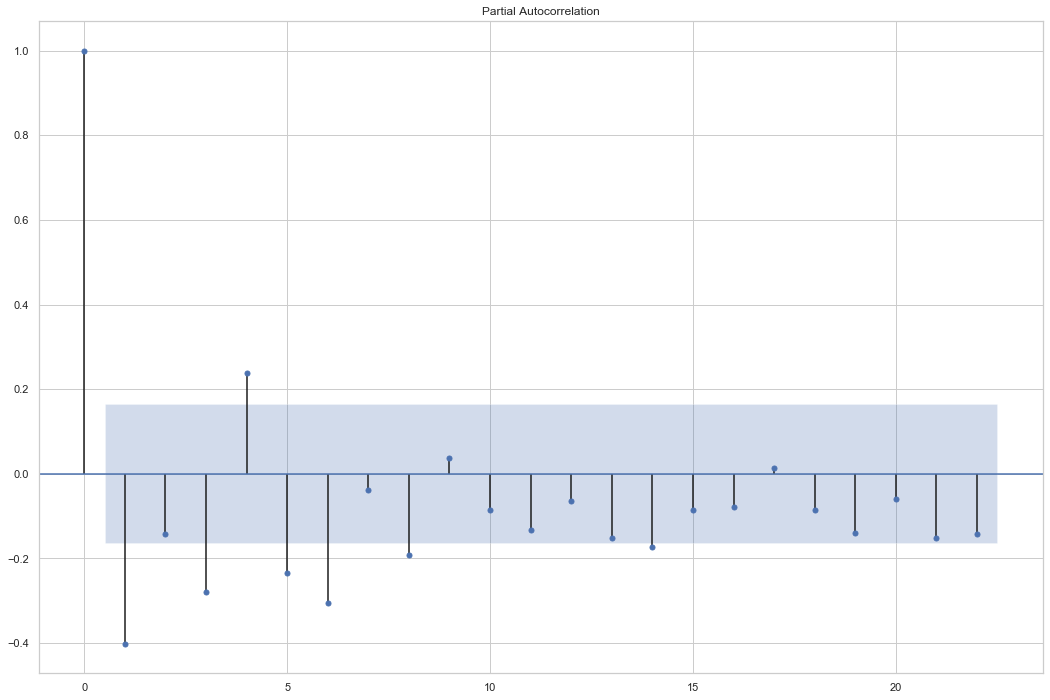

In [35]:
fig = plt.figure(figsize = (8,6))
result = plot_acf(ts_log_diff)
result1 = plot_pacf(ts_log_diff)

In [81]:
from statsmodels.tsa.arima_model import ARIMA

In [103]:
model = ARIMA(ts_log_diff.values, order = (1,0,1))

In [104]:
model_fit = model.fit(disp = 1)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  142
Model:                     ARMA(1, 1)   Log Likelihood                 135.550
Method:                       css-mle   S.D. of innovations              0.092
Date:                Thu, 11 Jun 2020   AIC                           -263.099
Time:                        12:19:43   BIC                           -251.276
Sample:                             0   HQIC                          -258.295
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.074e-05      0.000      0.272      0.786      -0.001       0.001
ar.L1.y        0.3821      0.078      4.884      0.000       0.229       0.535
ma.L1.y       -1.0000      0.019    -52.457      0.0

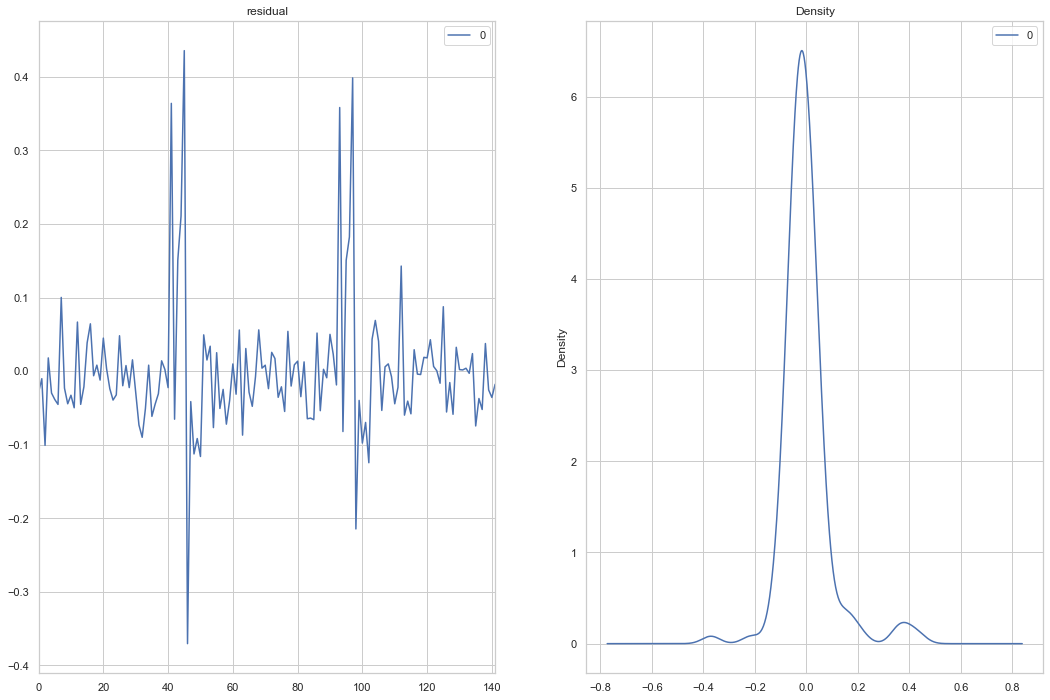

In [116]:
#lets plot the residual to see there is no hidden pattern in our model

residual1 = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2,)

residual1.plot(title = "residual", ax = ax[0])

residual1.plot(kind = 'kde', title = 'Density', ax=ax[1])

In [ ]:
#lets predict 

model_fit.plot_predict(dynamic=False)

In [121]:
# AUTO forecasting arima models

from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(df_log.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())




ModuleNotFoundError: No module named 'pmdarima'

In [119]:
!pip install pmdarima

  Using cached https://files.pythonhosted.org/packages/61/51/046cbc61c7607e5ecead6ff1a9453fba5e7e47a5ea8d608cc7036586a5ef/scipy-1.4.1-cp37-cp37m-win_amd64.whl
  Found existing installation: numpy 1.16.5
    Uninstalling numpy-1.16.5:
      Successfully uninstalled numpy-1.16.5


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\ajay\\anaconda3\\lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

